## Zero to ~~hero~~ starter with Python and hydropedological data science

This is a far too brief crash course to get started with Python. We use jupyter notebooks as interface to this programming language. Our focus is on reading and analysing environmental data. The examples will be related to hydropedological topics. To get there quickly, we will largely ignore most of the details about data types, storage allocation behaviour, different modules etc.

Let's go.

(cc) conrad.jackisch@tbt.tu-freiberg.de, April 05, 2022

### The Notebooks and how to use them
Please double click this text. You will enter the edit-mode. The cell type is set to *Markdown* to interpret this code as nice text. You can also enter some equations like this one:
$$\theta = \frac{V_{water}}{V_{total}}$$

The default cell type is *Code* which allows you to enter a couple of python commands. To execute the code, just hit `Shift+Enter` somewhere in the cell.

In [2]:
# in a code cell, a line starting with hash is ignored
# it is always good to write comments about what happens here

# here we load a couple of modules which are frequently needed
%pylab inline        
# PyLab is a collection of numerical and plotting libraries including NumPy and Matplotlib
import pandas as pd   #Pandas makes data exploration a breeze
import seaborn as sns #Seaborn (https://seaborn.pydata.org) makes nice plots 
sns.set(style='whitegrid', palette='deep') #this are some settings for seaborn

Populating the interactive namespace from numpy and matplotlib


### Some random data and respective analyses
Let's generate a couple of random data values and explore what we have got.

 * `pd` refers to functions from the [*Pandas*](https://pandas.pydata.org/docs/) module.
 * `np` refers to functions from the [*NumPy*](https://numpy.org/doc/stable/) module.
 * Round brackets contain arguments for a function `function(argument)` or can be a tuple `(number,number)`.
 * Corner brackets contain indexes `array[index]` or can be lists `[element,element]`.

In [3]:
np.random.random((20,2))
# this generates 2 columns of 20 random values each through the function np.random.random()
# but the array is not (yet) stored in any object

array([[0.37453456, 0.77382771],
       [0.59031546, 0.04935125],
       [0.68566637, 0.8013976 ],
       [0.63764375, 0.85370436],
       [0.44177826, 0.25239867],
       [0.8037763 , 0.78599478],
       [0.48813455, 0.42431586],
       [0.6647147 , 0.57473016],
       [0.82546334, 0.34396702],
       [0.15443554, 0.0167008 ],
       [0.97518588, 0.35104893],
       [0.24406966, 0.61923853],
       [0.68689694, 0.50582753],
       [0.58960942, 0.85334671],
       [0.43877269, 0.5596723 ],
       [0.78154581, 0.45031565],
       [0.23675209, 0.13706945],
       [0.57065741, 0.49676584],
       [0.39741377, 0.05571343],
       [0.04552614, 0.1525318 ]])

In [4]:
# convert the array to a pandas DataFrame through the respective function pd.DataFrame()
# store in the object *data* using '='

data = pd.DataFrame(np.random.random((20,2)))

# you can print the data frame:
data

,0,1
0,0.476049,0.680843
1,0.261203,0.592642
2,0.702088,0.574935
3,0.373166,0.491244
4,0.065113,0.679028
5,0.043158,0.444439
6,0.932253,0.996356
7,0.976749,0.830565
8,0.038479,0.138861
9,0.156317,0.194617


In [5]:
# you can transpose the data frame (but again this is not stored)
data.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.476049,0.261203,0.702088,0.373166,0.065113,0.043158,0.932253,0.976749,0.038479,0.156317,0.104627,0.221293,0.424015,0.145866,0.493884,0.218195,0.925637,0.229958,0.075128,0.188634
1,0.680843,0.592642,0.574935,0.491244,0.679028,0.444439,0.996356,0.830565,0.138861,0.194617,0.368440,0.122525,0.915636,0.899282,0.556205,0.002921,0.267639,0.924701,0.082407,0.804406


In [6]:
# you can give the data frame a new index and column names
# we like to make it a time series starting 2020-07-01 12:00 stepping hourly
data.index = pd.to_datetime(np.arange(len(data)), unit='h', origin=pd.Timestamp('2020-07-01 12:00:00'))

# and we like to call the columns 'birds' and 'monkeys'
data.columns = ['birds', 'monkeys']
data

,birds,monkeys
2020-07-01 12:00:00,0.476049,0.680843
2020-07-01 13:00:00,0.261203,0.592642
2020-07-01 14:00:00,0.702088,0.574935
2020-07-01 15:00:00,0.373166,0.491244
2020-07-01 16:00:00,0.065113,0.679028
2020-07-01 17:00:00,0.043158,0.444439
2020-07-01 18:00:00,0.932253,0.996356
2020-07-01 19:00:00,0.976749,0.830565
2020-07-01 20:00:00,0.038479,0.138861
2020-07-01 21:00:00,0.156317,0.194617


### Now some plots

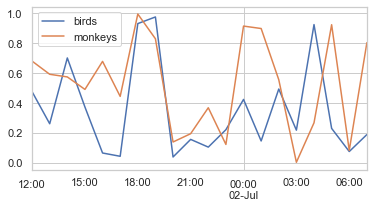

In [7]:
# define a figure size and ratio
figsize(6,3)

# plot a pandas DataFrame by chaining the function plot() to it
data.plot()

Text(0.5, 1.0, 'Birds and Monkeys')

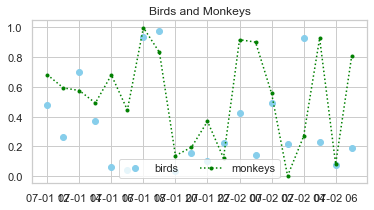

In [8]:
# alternatively, you can use the function plot() directly and give the DataFrame or 
# single columns of it as an argument:
plot(data.birds,'o',c='skyblue',label='birds')
plot(data.monkeys,'.:',c='green',label='monkeys')
legend(ncol=2, loc=8)
title('Birds and Monkeys')

# by this you gain more control about you plots at the cost of more need for definitions

Play with the plots above and change the appearance.

 * Colours: https://matplotlib.org/stable/gallery/color/named_colors.html
 * Linestyles: https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
 * Figsize: Definition of ratio and size of the figure

### More plots

(-0.1, 1.1)

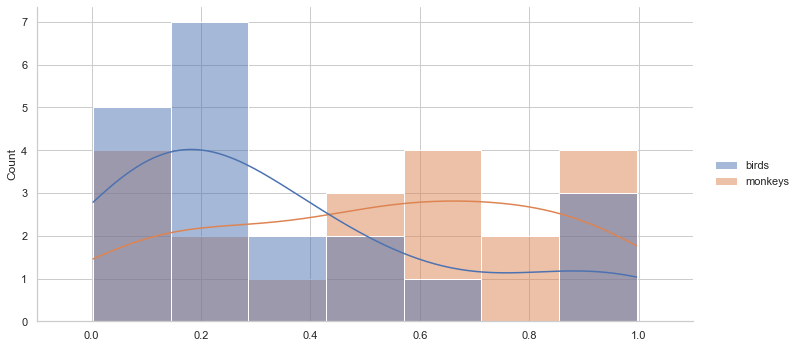

In [13]:
# we often need a quick look into data through histograms and KDEs
sns.displot(data, kde=True, aspect=2)
xlim(-0.1,1.1)

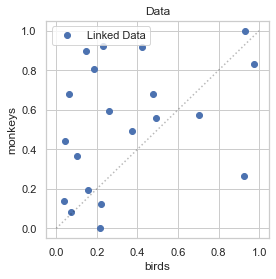

In [15]:
figsize(4,4)
plot(data.birds, data.monkeys, 'o', label='Linked Data')
plot([0,1],[0,1],':',c='k',alpha=0.3)
xlabel('birds')
ylabel('monkeys')
title('Data')
legend()

In order to save a plot, you can use the following command inside the respective cell:
`savefig('file.pdf',bbox_inches='tight')`

## Read data and plot it
In most cases, we will need to read data. That is quite easy when the data is somewhat structured. Excel, csv or hdf5 files are quickly handled with: `pd.read_excel('file.xlsx', sheet_name='Sheet')`, `pd.read_csv('file.csv')`, `pd.read_hdf('file.hdf')`

In [19]:
# let's read some meteorological data from the station Lichtenhain
# this reads the file 'Lichtenhain.csv' and converts the index to a datetime format
meteo = pd.read_csv('Lichtenhain_daily.csv',index_col=0)
meteo.index = pd.to_datetime(meteo.index)
meteo

,T,Tmin,Tmax,Prec,Rad,Rs,RH,u2,u2mx,vap,aP,EToPM,EToHG,EToSJ,EToPM2,EToPT
1991-01-02,2.9,-0.3,4.5,2.5,NaN,NaN,86.00,NaN,NaN,6.1,NaN,NaN,0.282061,0.0,NaN,NaN
1991-01-03,7.7,4.3,11.7,6.3,NaN,NaN,86.00,NaN,NaN,9.1,NaN,NaN,0.435084,0.0,NaN,NaN
1991-01-04,6.6,5.3,9.4,1.7,NaN,NaN,92.00,NaN,NaN,9.0,NaN,NaN,0.312689,0.0,NaN,NaN
1991-01-05,3.8,2.7,6.2,0.2,NaN,NaN,73.00,NaN,NaN,5.9,NaN,NaN,0.258210,0.0,NaN,NaN
1991-01-06,4.4,2.3,6.4,0.0,NaN,NaN,65.00,NaN,NaN,5.4,NaN,NaN,0.290149,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,-0.8,-2.6,1.3,0.0,NaN,NaN,71.67,8.7,22.9,4.1,964.87,NaN,0.201988,0.0,NaN,NaN
2020-12-28,1.2,0.7,2.2,0.0,NaN,NaN,82.63,6.7,19.4,5.5,947.75,NaN,0.140762,0.0,NaN,NaN
2020-12-29,2.1,-0.4,5.0,0.0,NaN,NaN,82.33,5.6,15.4,5.8,953.26,NaN,0.281419,0.0,NaN,NaN
2020-12-30,1.4,-0.5,3.7,0.0,NaN,NaN,82.33,4.1,9.3,5.6,965.31,NaN,0.241055,0.0,NaN,NaN


With time series data, we gain a lot of nice functionality. In many cases, we might like to aggregate or to subsample such data. Once the index is in a datatime format, this becomes pretty straight forward:

In [22]:
# let's create weekly aggregates with resample
# we have to define the desired frequency '1W' (one week) and the respective operation per column:
meteox = meteo.resample('1W').agg({'T':'mean','Tmin':'min','Tmax':'max','Prec':'sum','RH':'mean','u2':'mean','u2mx':'max','vap':'mean','aP':'mean','EToPM':'sum','EToHG':'sum','EToSJ':'sum','EToPM2':'sum','EToPT':'sum'})

Let's plot the data again. This time we use the package [*plotly*](https://plotly.com/python/getting-started/) to create interactive plots.

In [23]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default='iframe' #on windows this likely needs to read 'notebook'
from plotly.subplots import make_subplots
import plotly.graph_objects as go


In [27]:
# set up plotly figure
fig = make_subplots(1,1)
fig.add_trace(go.Bar(x=meteox.index, y=meteox['Prec'], name='Prec (weekly)', marker_color = 'steelblue', opacity=0.4))
fig.add_trace(go.Bar(x=meteo.index, y=meteo['Prec'], name='Prec (daily)', marker_color = 'orange', opacity=0.9))
fig.update_layout({'template': 'none', 'yaxis_title': 'Precipitation (mm)'})
fig.show()

Once we know which section of the time series we are focussing on, we can use our *normal* plot routines again:

Text(0, 0.5, 'Relative Humidity (%)')

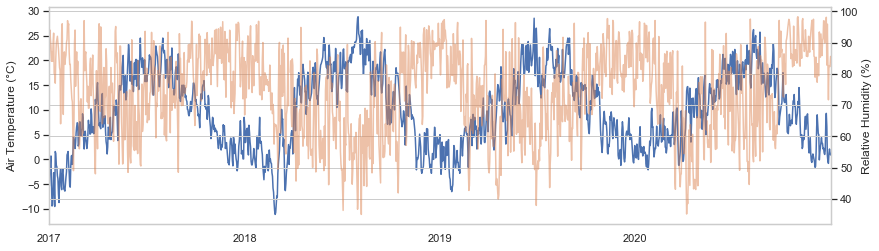

In [29]:
figsize(14,4)
tst = pd.to_datetime('2017-01-01 00:00:00')
tnd = pd.to_datetime('2021-11-01 00:00:00')

meteo.loc[tst:tnd,'T'].plot()
ylabel('Air Temperature (°C)')
meteo.loc[tst:tnd,'RH'].plot(secondary_y=True,alpha=0.5)
ylabel('Relative Humidity (%)')

Please play a little with the given examples. Check how to save the figures etc.